In [1]:

from google.colab import files
uploaded = files.upload()

Saving my_dataset.npz to my_dataset.npz


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder

In [4]:
data = np.load("/content/my_dataset.npz")
X_train = data['x_train']
X_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']
print( X_train.shape)
print(X_test.shape)

(2084, 28, 28, 1)
(522, 28, 28, 1)


In [5]:
# normalize section
X_train = X_train.astype("float32")/255.0
X_test  = X_test.astype("float32")/255.0

In [11]:
# Neural Network Section
inputs = Input((28,28))
x = Flatten()(inputs)
x1 = Dense(256, activation="relu")(x)
x2 = Dense(128,  activation="relu")(x1)
x3 = Dense(64,  activation="relu")(x2)
x4 = Dense(32,  activation="relu")(x3)
x5=Dense(16,  activation="relu")(x4)
outputs = Dense(10, activation="softmax")(x5)
model = Model(inputs, outputs)

In [12]:
#Compile Section
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [13]:
#model fitting
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.1892 - loss: 2.1939 - val_accuracy: 0.2969 - val_loss: 2.0078
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3439 - loss: 1.8375 - val_accuracy: 0.3793 - val_loss: 1.7094
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4920 - loss: 1.4596 - val_accuracy: 0.4406 - val_loss: 1.6086
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5592 - loss: 1.2839 - val_accuracy: 0.4847 - val_loss: 1.4807
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6393 - loss: 1.0535 - val_accuracy: 0.5230 - val_loss: 1.4611
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6721 - loss: 0.9416 - val_accuracy: 0.5575 - val_loss: 1.4205
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7108 - loss: 0.8377 - val_accuracy: 0.5651 - val_loss: 1.3876
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7117 - loss: 0.8358 - val_accuracy: 0.5613 - 

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Test Accuracy: 0.5977011494252874


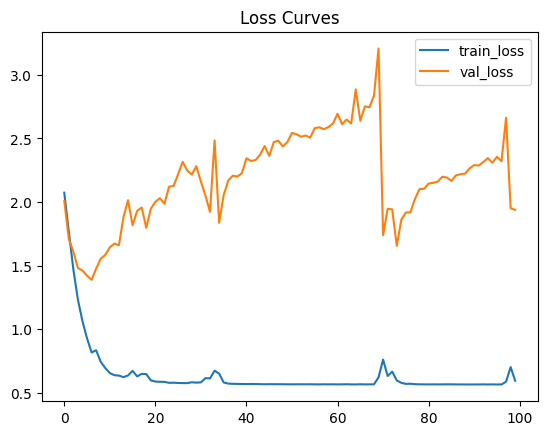

In [14]:
#predict the accuracy and validation loss
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("Test Accuracy:", float(acc))

plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

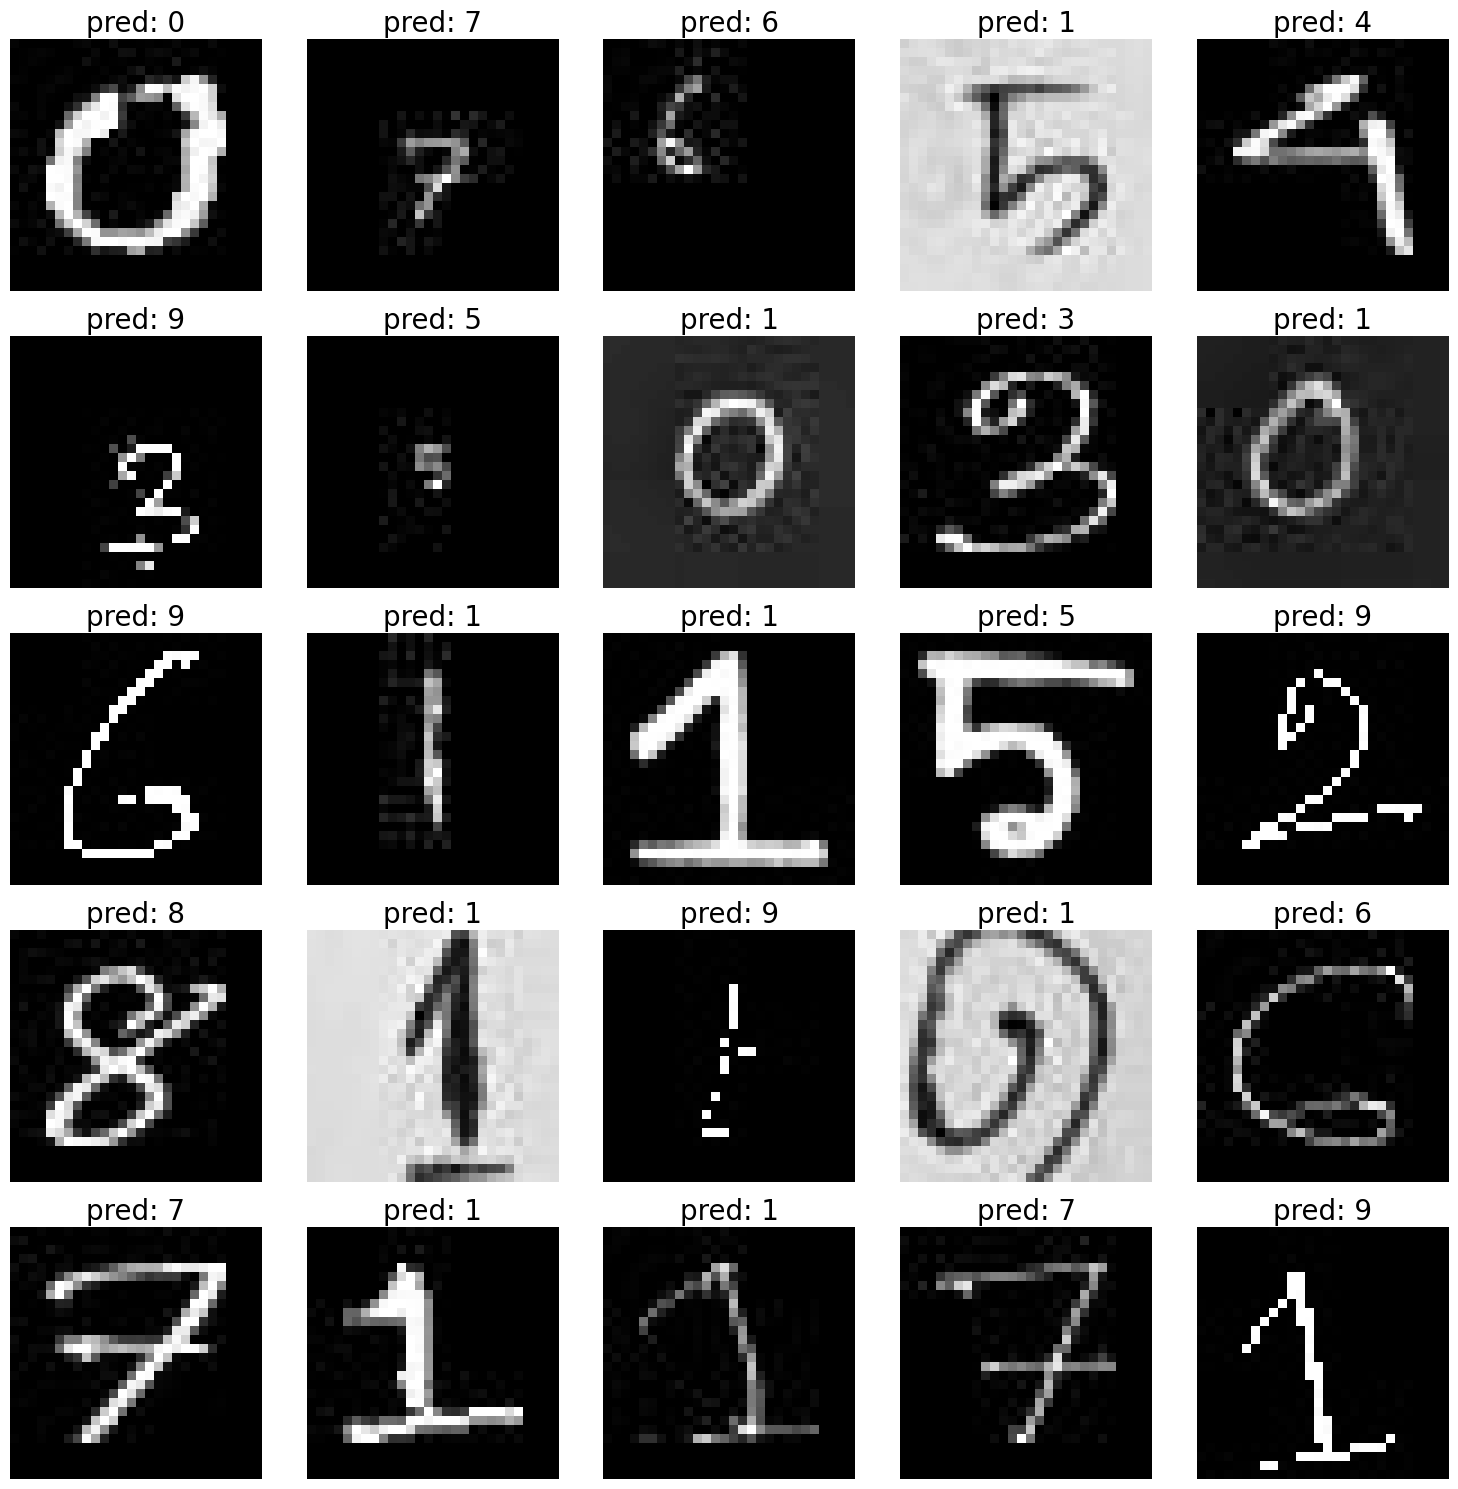

In [15]:
#predict and plot the image with label

plt.figure(figsize=(15,15))
n_show = min(25, len(X_test))

rows, cols = 5, 5

for i in range(n_show):
    plt.subplot(rows, cols, i+1)
    sample = X_test[i].reshape(1, 28, 28, 1)

    pred = model.predict(sample, verbose=0).argmax(axis=1)[0]
    plt.title(f"pred: {pred}", fontsize=20)

    plt.imshow(X_test[i], cmap="gray")
    plt.axis('off')

plt.tight_layout()
plt.show()